# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 目次
* [30. 形態素解析結果の読み込み](#sec1)
* [31. 動詞](#sec2)
* [32. 動詞の原形](#sec3)
* [33. サ変名詞](#sec4)
* [34. AのB](#sec5)
* [35. 名詞の連接](#sec6)
* [36. 単語の出現頻度](#sec7)
* [37. 頻出上位10語](#sec8)
* [38. ヒストグラム](#sec9)
* [39. Zipfの法則](#sec10)  

## リンク
吾輩は猫である ([neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt))  

## MeCab
出力フォーマットは, **表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音**

In [77]:
!mecab data/neko.txt -o work/neko.txt.mecab

In [106]:
!head -n 20 work/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ


# 30. 形態素解析結果の読み込み<a id="sec1"></a>
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．



In [17]:
%%file q30.py
from itertools import groupby
from pprint import pprint
neko = []
with open("work/neko.txt.mecab", "r") as f:
    for is_eos, sent_block in groupby(f, key=lambda x: x.strip() == "EOS"):
        if not is_eos:
            sentence = []
            for line in sent_block:
                details = line.rstrip().replace("\t", ",").split(",")
                morph = {
                    "surface": details[0],
                    "base": details[7],
                    "pos": details[1],
                    "pos1": details[2]
                }
                sentence.append(morph)
            neko.append(sentence)

Overwriting q30.py


# 31.動詞<a id="sec2"></a>
動詞の表層形をすべて抽出せよ．

In [18]:
%%file q31.py
from q30 import neko
verb_surface = {word['surface'] for sentence in neko for word in sentence if word['pos'] == "動詞"}
print(verb_surface)

Overwriting q31.py


# 32. 動詞の原形<a id="sec3"></a>
動詞の原形をすべて抽出せよ

In [20]:
%%file q32.py
from q30 import neko
verb_surface = {word['base'] for sentence in neko for word in sentence if word['pos'] == "動詞"}

Overwriting q32.py


# 33. サ変名詞<a id="sec3"></a>
サ変接続の名詞をすべて抽出せよ．

In [21]:
%%file q33.py
from q30 import neko
verb_surface = {word['base'] for sentence in neko for word in sentence if word['pos1'] == "サ変接続"}

Overwriting q33.py


# 34. 「AのB」<a id="sec4"></a>
2つの名詞が「の」で連結されている名詞句を抽出せよ

In [22]:
%%file q34.py
from q30 import neko
connected_no = {sentence[i]['surface'] + "の" + sentence[i+2]['surface'] 
             for sentence in neko 
                 for i in range(len(sentence) - 2) 
                     if all((sentence[i]['pos'] == "名詞", sentence[i+1]['surface'] == "の",
                         sentence[i+2]['pos'] == "名詞"))}

Overwriting q34.py


# 35. 名詞の連接<a id="sec5"></a>
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [23]:
%%file q35.py
from q30 import neko
from itertools import groupby
connected_noun = set()
for sentence in neko:
    for is_noun, noun_block in groupby(sentence, lambda x: x['pos'] == "名詞"):
        if is_noun :
            nouns = list(noun_block)
            if len(nouns) > 1:
                connected_noun.add("".join(noun['surface'] for noun in nouns))
print(connected_noun)

Overwriting q35.py


# 36. 単語の出現頻度<a id="sec6"></a>
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [24]:
%%file q36.py
from collections import Counter
from q30 import neko
all_words = (word['base'] for sentence in neko for word in sentence)
count_words = Counter(all_words)
print(count_words.most_common(10))

Writing q36.py


# 37. 頻度上位10語<a id="sec7"></a>
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

グラフmatplotlibが基本  
seabornなどはmatplotlibのAPIにアクセスしている  
pandasからグラフを作るのも便利  
サーバーに入っているフォントを使うと良い  
VL_Gothic  
TakaoPGothic  
matplotlib.rc('pdf', fonttype=42)  
plt.xkcd()

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("classic")
sns.set(font='AppleGothic')
#sns.set(font='VL_Gothic')

label, y = [], []
for word, i in count_words.most_common(10):
    label.append(word)
    y.append(i)
x = [i for i in range(10)]
plt.bar(x, y, tick_label =label, align="center")
plt.ylabel("frequency", fontsize=20)
plt.show()

NameError: name 'count_words' is not defined

# 38. ヒストグラム<a id="sec8"></a>
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

%matplotlib inline書こう
takaogothic
osaka
matplotlib.font_manager
np.array.astype(この型だと思ってください)思えないとエラー(str→int)

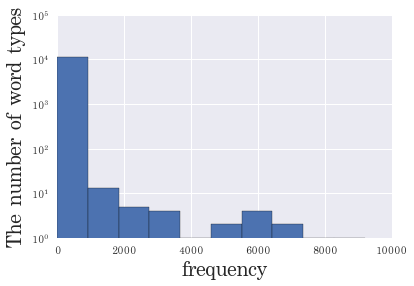

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
y = [c for _, c in count_words.most_common()]
plt.hist(y,bins=10, log=True)
plt.xlabel("frequency", fontsize=20)
plt.ylabel("The number of word types", fontsize=20)
plt.show()

# 39. Zipfの法則<a id="sec9"></a>
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [ ]:
出現頻度の低い単語は学習されにくい→ on the fly  
pandasが便利そう  
必要になった時に調べれば良い  

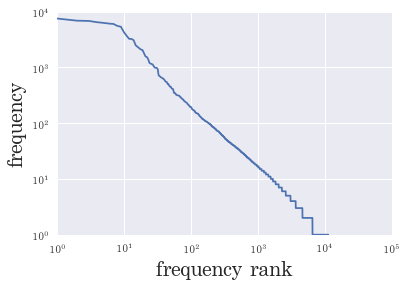

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
freq = [c for _, c in count_words.most_common()]
uniq_freq = sorted(freq, reverse = True)
x = [i for i in range(len(uniq_freq))]
plt.loglog(x,freq)
plt.xlabel("frequency rank", fontsize=20)
plt.ylabel("frequency", fontsize=20)
plt.show()